In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import chi2_contingency




In [2]:
hate_crime_path = os.path.join('..', 'Resources', 'hate_crime.csv')

crime_data = pd.read_csv(hate_crime_path)
crime_data.head()


,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S


In [3]:
#Make new DataFrame without unnecessary columns
columns_to_keep = ['incident_id', 'state_abbr', 'data_year','incident_date', 'victim_count', 'offender_race', 'bias_desc']

hate_crime_summary = crime_data[columns_to_keep]

hate_crime_summary.head()

,incident_id,state_abbr,data_year,incident_date,victim_count,offender_race,bias_desc
0,43,AR,1991,1991-07-04,1,Black or African American,Anti-Black or African American
1,44,AR,1991,1991-12-24,2,Black or African American,Anti-White
2,45,AR,1991,1991-07-10,2,Black or African American,Anti-White
3,46,AR,1991,1991-10-06,1,Black or African American,Anti-White
4,47,AR,1991,1991-10-14,1,White,Anti-Black or African American


In [4]:
# Split the combined entries in 'bias_desc' into individual categories
hate_crime_summary.loc[:,'bias_desc'] = hate_crime_summary['bias_desc'].str.split(';')
expanded_df = hate_crime_summary.explode('bias_desc')
grouped_df = expanded_df.groupby('bias_desc').size().reset_index(name='count')
grouped_df = grouped_df.sort_values(by='count', ascending=False)

print(grouped_df)

                                            bias_desc  count
5                      Anti-Black or African American  82292
18                                        Anti-Jewish  30469
33                                         Anti-White  27352
11                                    Anti-Gay (Male)  24189
15                            Anti-Hispanic or Latino  15643
27                 Anti-Other Race/Ethnicity/Ancestry  11666
20  Anti-Lesbian, Gay, Bisexual, or Transgender (M...   8091
2                                          Anti-Asian   7777
23                         Anti-Multiple Races, Group   5820
19                              Anti-Lesbian (Female)   4981
16                              Anti-Islamic (Muslim)   4345
28                                Anti-Other Religion   3702
0               Anti-American Indian or Alaska Native   2727
7                                       Anti-Catholic   1840
32                                   Anti-Transgender   1577
1                       

In [5]:

# Define a function to categorize the hate crime descriptions
def categorize_bias(bias_desc):
    mapping = {
        "Anti-Race": ["Anti-Black or African American", "Anti-Hispanic or Latino", 'Anti-Other Race/Ethnicity/Ancestry', 'Anti-Asian',
                                "Anti-Multiple Races, Group", 'Anti-Arab', 'Anti-American Indian or Alaska Native', 
                                'Anti-American Indian or Alaska Native', 'Anti-American Indian or Alaska Native','Anti-Native Hawaiian or Other Pacific Islander',
                               'Anti-White'],
        'Anti-LGBTQ': ['Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)', 'Anti-Gender Non-Conforming', 'Anti-Gay (Male)', 
                       'Anti-Lesbian (Female)', 'Anti-Transgender', 'Anti-Bisexual', 'Anti-Heterosexual'],
        'Anti-Religion': ['Anti-Jewish', 'Anti-Islamic (Muslim)', 'Anti-Catholic', 'Anti-Multiple Religions, Group','Anti-Protestant', 
                          'Anti-Atheism/Agnosticism', "Anti-Jehova's Witness", "Anti-Other Christian", "Anti-Other Religion", "Anti-Hindu", "Anti-Buddhist",
                          "Anti-Church of Jesus Christ", "Anti-Eastern Orthodox (Russian, Greek, Other)", "Anti-Sikh"],
        'Anti-Disability': ["Anti-Mental Disability", "Anti-Physical Disability"],
        'Anti-Gender': ["Anti-Female","Anti-Male"],
        'Unknown': ["Unknown (offender's motivation not known)"]
    }
    
    for category, keywords in mapping.items():
        if any(keyword in bias_desc for keyword in keywords):
            return category
        
    
hate_crime_processed = hate_crime_summary.copy()

hate_crime_processed['Bias_Category'] = hate_crime_processed['bias_desc'].apply(categorize_bias)

# Convert DataFrame into CSV file
hate_crime_processed.to_csv('output_file.csv', index=False)

#Show DataFrame
hate_crime_processed.head()

,incident_id,state_abbr,data_year,incident_date,victim_count,offender_race,bias_desc,Bias_Category
0,43,AR,1991,1991-07-04,1,Black or African American,[Anti-Black or African American],Anti-Race
1,44,AR,1991,1991-12-24,2,Black or African American,[Anti-White],Anti-Race
2,45,AR,1991,1991-07-10,2,Black or African American,[Anti-White],Anti-Race
3,46,AR,1991,1991-10-06,1,Black or African American,[Anti-White],Anti-Race
4,47,AR,1991,1991-10-14,1,White,[Anti-Black or African American],Anti-Race


In [6]:
# Copy dataframe
crime_processed = hate_crime_processed.copy()

# Add Before and After column for the years before and after September 1, 2001 (Limited to 10 YRS). 
crime_processed['Before_After'] = np.where(hate_crime_processed['incident_date'] < '2001-09-11', 'Before', 'After')
crime_processed

,incident_id,state_abbr,data_year,incident_date,victim_count,offender_race,bias_desc,Bias_Category,Before_After
0,43,AR,1991,1991-07-04,1,Black or African American,[Anti-Black or African American],Anti-Race,Before
1,44,AR,1991,1991-12-24,2,Black or African American,[Anti-White],Anti-Race,Before
2,45,AR,1991,1991-07-10,2,Black or African American,[Anti-White],Anti-Race,Before
3,46,AR,1991,1991-10-06,1,Black or African American,[Anti-White],Anti-Race,Before
4,47,AR,1991,1991-10-14,1,White,[Anti-Black or African American],Anti-Race,Before
...,...,...,...,...,...,...,...,...,...
241658,1473449,WY,2022,2022-06-01,2,White,[Anti-White],Anti-Race,After
241659,1473450,WY,2022,2022-09-19,1,White,[Anti-Gay (Male)],Anti-LGBTQ,After
241660,1476554,WY,2022,2022-11-08,2,White,[Anti-Hispanic or Latino],Anti-Race,After
241661,1476555,WY,2022,2022-11-15,1,White,[Anti-Black or African American],Anti-Race,After


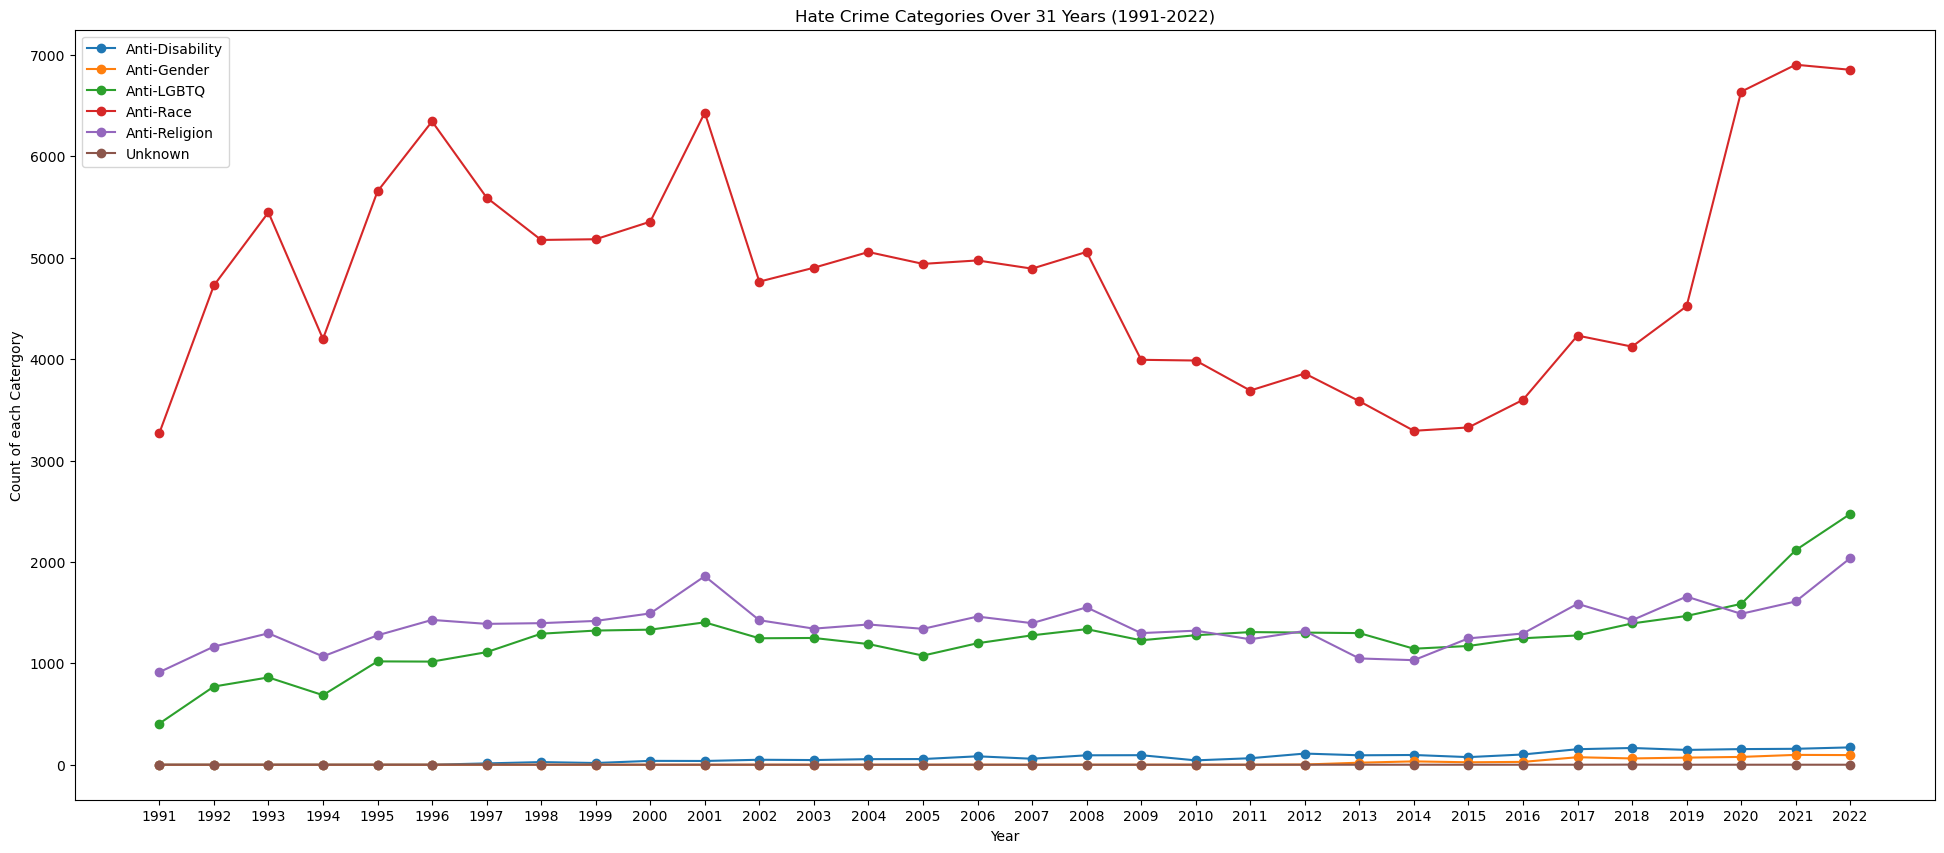

In [7]:
#Create scatter line plot representing the count and the years of each category of hate crime:

# Group by Year, Bias_Category, and Before_After to get the count for each category in each year
grouped_data_scatter = crime_processed.groupby(['data_year', 'Bias_Category']).size().reset_index(name='Count')

# Convert to integers
grouped_data_scatter['data_year'] = grouped_data_scatter['data_year'].astype(int)

# Pivot the data
pivot_data = grouped_data_scatter.pivot(index='data_year', columns='Bias_Category', values='Count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(24, 10))

# Scatter plot for each category
for category in pivot_data.columns:
    ax.plot(pivot_data.index, pivot_data[category], label=category, marker='o')  # Use 'o' for markers

# Set x-ticks based on the index of pivot_data
ax.set_xticks(pivot_data.index)

ax.set_xlabel('Year')
ax.set_ylabel('Count of each Catergory')
ax.set_title('Hate Crime Categories Over 31 Years (1991-2022)')
ax.legend()
plt.savefig('../Analysis/Hate Crime Categories Over 31 Years (1991-2022)')
plt.show()

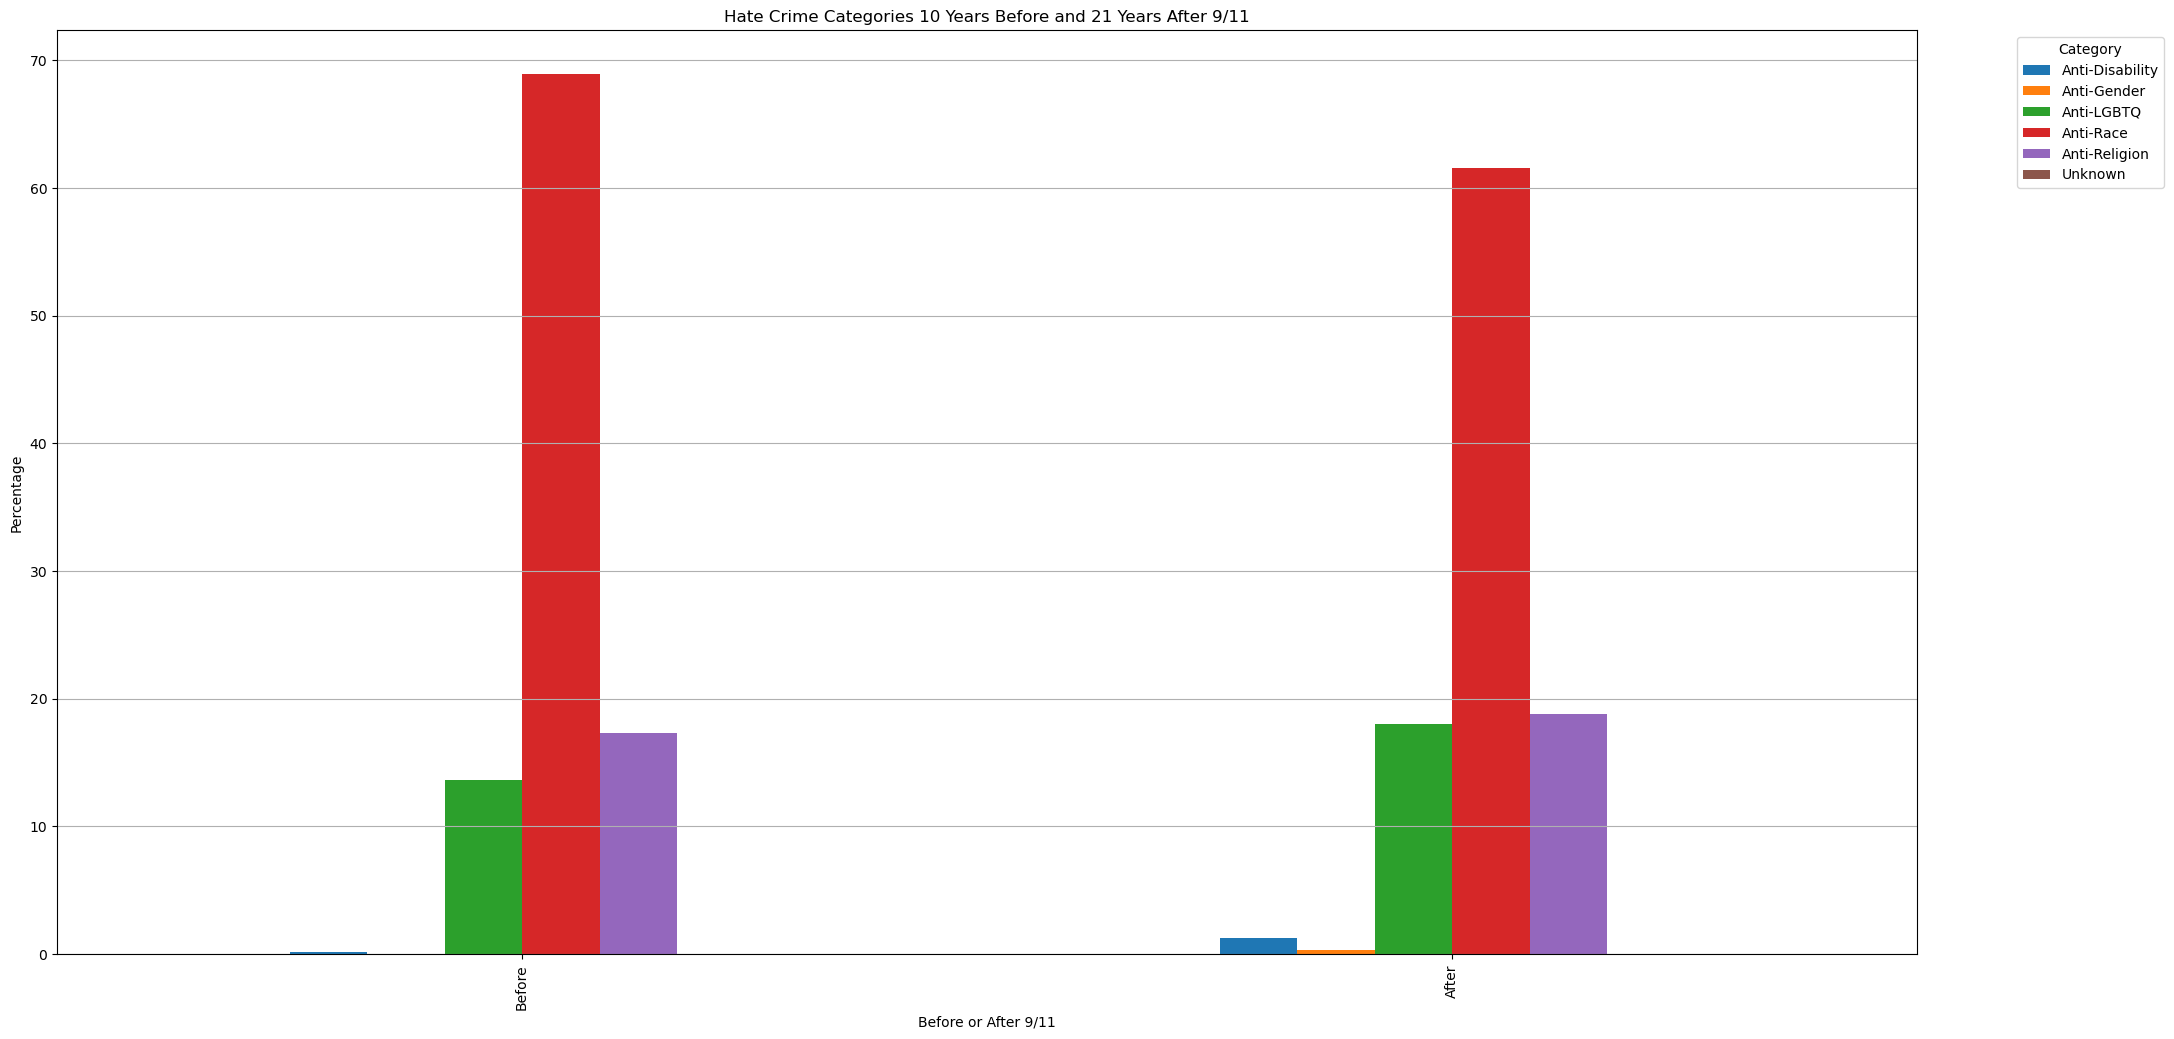

In [8]:

#Create a bar plot representing the percentage of category before and after 9/11:

# Convert 'Before_After' to categorical with specified order
order = ['Before', 'After']
crime_processed['Before_After'] = pd.Categorical(crime_processed['Before_After'], categories=order, ordered=True)

# Group by Before_After to get the count for the selected category in each year
grouped_data = crime_processed.groupby(['Before_After', 'Bias_Category']).size().unstack()

# Calculate percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting
ax = percentage_data.plot(kind='bar', stacked=False, figsize=(24, 12))
ax.set_ylabel('Percentage')
ax.set_xlabel('Before or After 9/11')
ax.set_title('Hate Crime Categories 10 Years Before and 21 Years After 9/11')
ax.yaxis.grid(True)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../Analysis/Bar Plot- Hate Crime Categories Over Time')
plt.show()

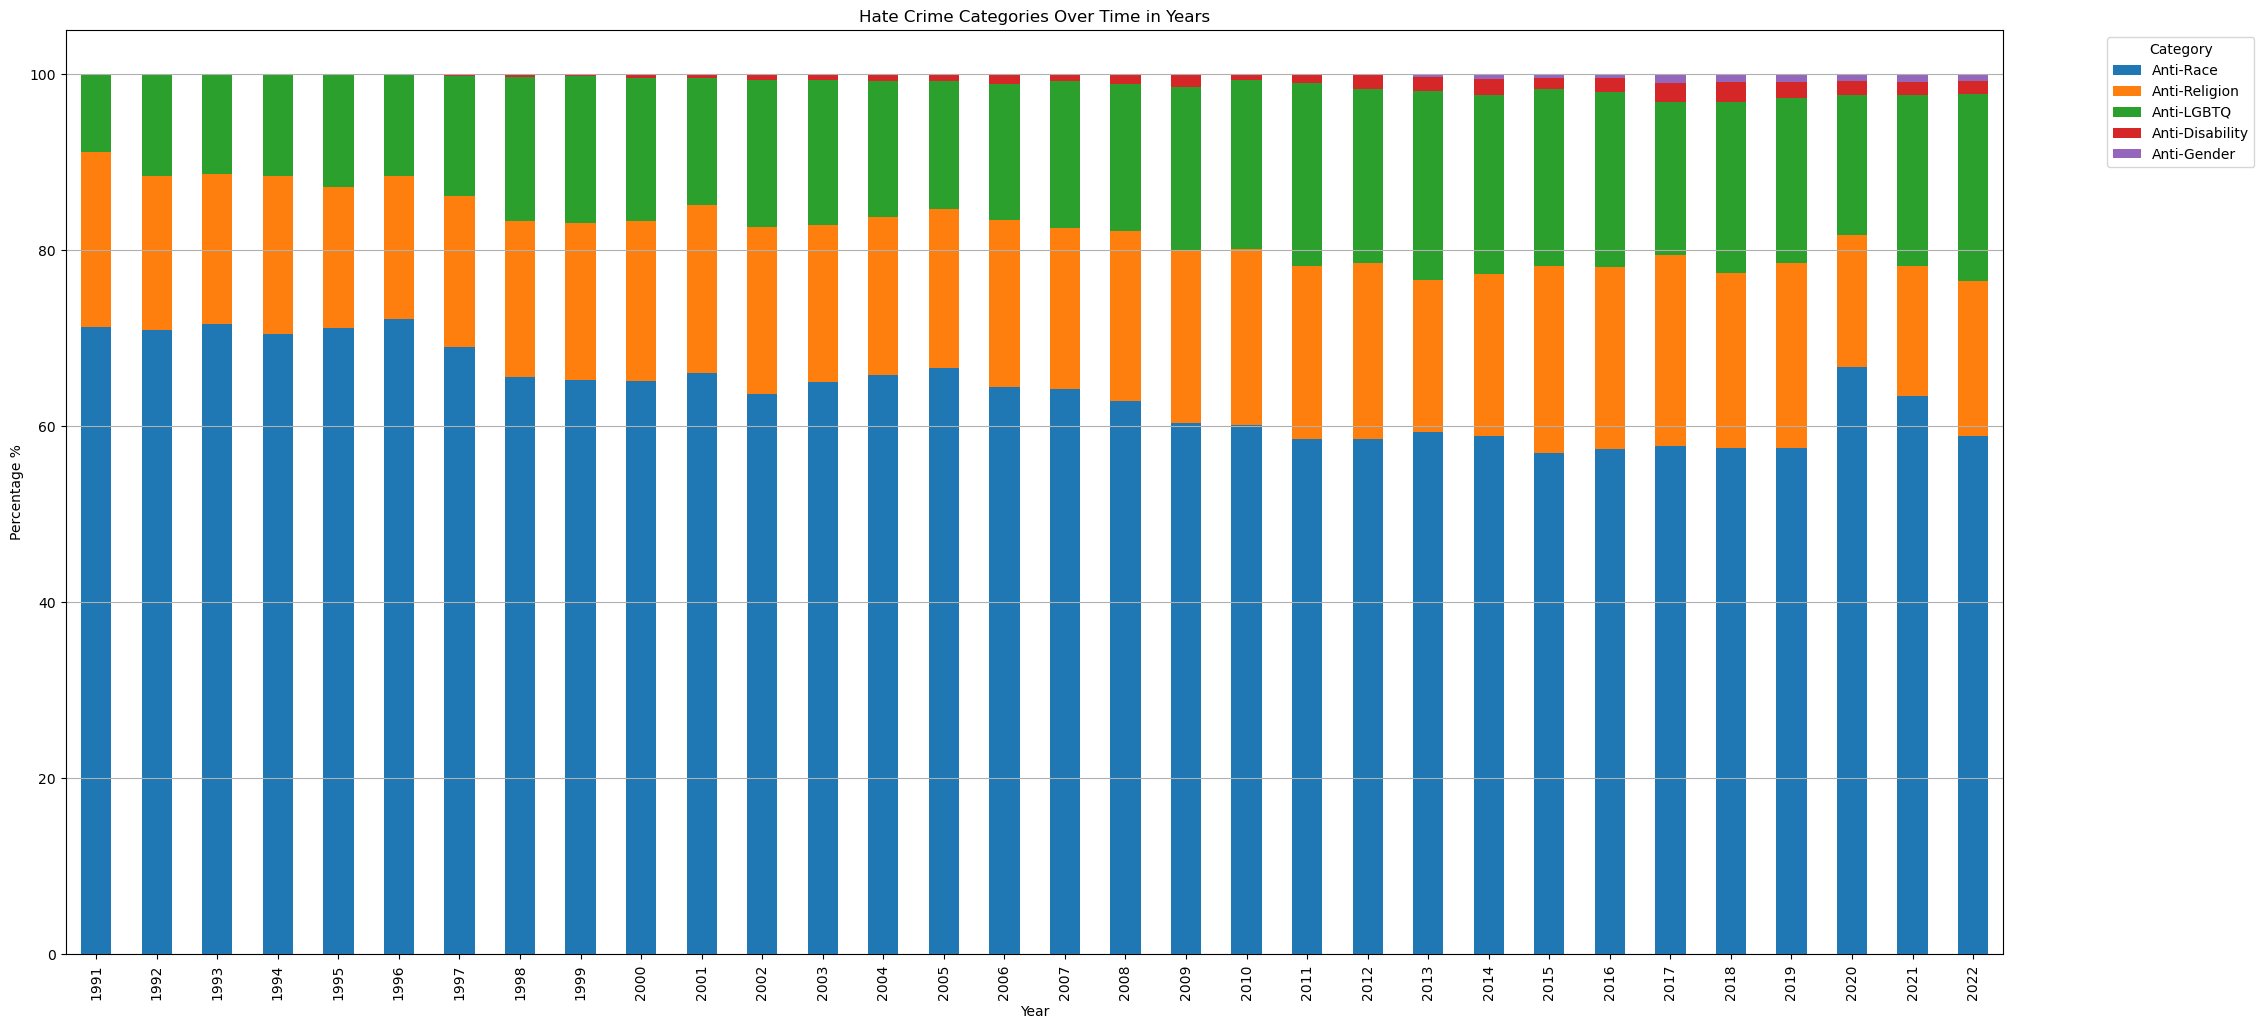

In [9]:
#Create a bar plot representing the percentage of category before and after 9/11:

# Convert 'Before_After' to categorical with specified order
order = ['Anti-Race', 'Anti-Religion', 'Anti-LGBTQ', 'Anti-Disability', 'Anti-Gender']
crime_processed['Bias_Category'] = pd.Categorical(crime_processed['Bias_Category'], categories=order, ordered=True)

# Group by Before_After to get the count for the selected category in each year
grouped_data = crime_processed.groupby(['data_year', 'Bias_Category']).size().unstack()

# Calculate percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting
ax = percentage_data.plot(kind='bar', stacked=True, figsize=(25, 12))
ax.set_ylabel('Percentage %')
ax.set_xlabel('Year')
ax.set_title('Hate Crime Categories Over Time in Years')
ax.yaxis.grid(True)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='best')
plt.savefig('../Analysis/Filled Bar Plot- Hate Crime Categories Over Time in Years')
plt.show()

In [11]:
crime_data.reset_index(drop=True)
crime_data['incident_date'] = pd.to_datetime(crime_data['incident_date'])

crime_data['bias_desc'].value_counts()

bias_desc
Anti-Black or African American                                                   81440
Anti-Jewish                                                                      29958
Anti-White                                                                       27115
Anti-Gay (Male)                                                                  23860
Anti-Hispanic or Latino                                                          15442
                                                                                 ...  
Anti-Heterosexual;Anti-Islamic (Muslim);Anti-Multiple Races, Group                   1
Anti-Black or African American;Anti-Native Hawaiian or Other Pacific Islander        1
Anti-Black or African American;Anti-Gay (Male);Anti-Gender Non-Conforming            1
Anti-Black or African American;Anti-Hispanic or Latino;Anti-Islamic (Muslim)         1
Anti-American Indian or Alaska Native;Anti-Female;Anti-Hispanic or Latino            1
Name: count, Length: 373, dtype: 

<Axes: title={'center': 'Hate Crime Activity In 1992'}>

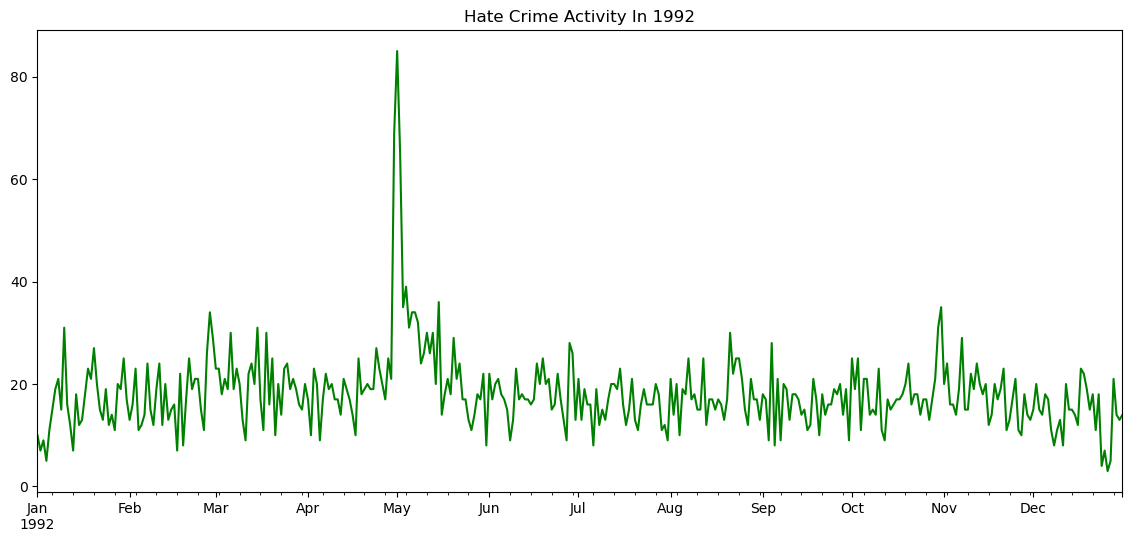

In [17]:

df1992 = crime_data[crime_data['data_year'] == 1992]
incident_date_1992 = df1992.groupby('incident_date').size()
incident_date_1992.plot(kind='line', figsize=(14,6), title='Hate Crime Activity In 1992', color='green', xlabel='')

<Axes: title={'center': 'Hate Crime Activity In 1996'}>

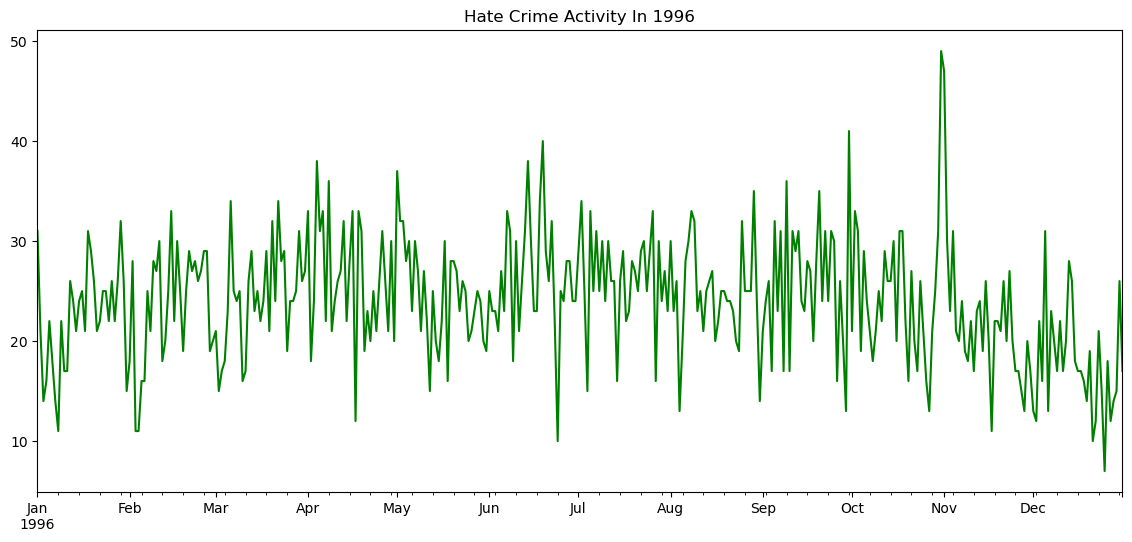

In [18]:

df1996 = crime_data[crime_data['data_year'] == 1996]
incident_date_1996 = df1996.groupby('incident_date').size()
incident_date_1996.plot(kind='line', figsize=(14,6), title='Hate Crime Activity In 1996', color='green', xlabel='')

<Axes: title={'center': 'Hate Crime Activity In 2001'}>

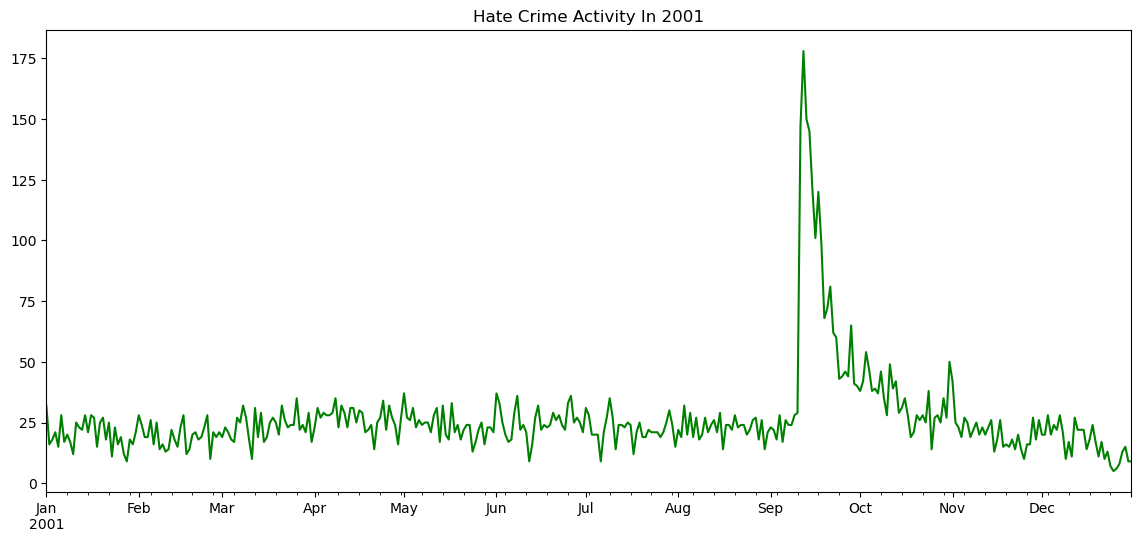

In [19]:

df2001 = crime_data[crime_data['data_year'] == 2001]
incident_date_2001 = df2001.groupby('incident_date').size()
incident_date_2001.plot(kind='line', figsize=(14,6), title='Hate Crime Activity In 2001', color='green', xlabel='')

In [10]:
# Group by Before_After to get the count for the selected category in each year
grouped_data = crime_processed.groupby(['Before_After', 'Bias_Category']).size().unstack()

# Calculate percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# List of bias categories
bias_categories = ['Anti-Race', 'Anti-Religion', 'Anti-LGBTQ', 'Anti-Disability', 'Anti-Gender']

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame()

# Iterate through each bias category
for bias_category in bias_categories:
    # Subset data for the current bias category
    columns_to_keep = ['Before', 'After']
    percentage_data_subset = percentage_data[[bias_category]].rename(columns={bias_category: 'Before'})

    # Add 'After' column to the subset
    percentage_data_subset['After'] = 100 - percentage_data_subset['Before']

    # Perform Chi-Square test and add p-values and chi-square values to the table
    chi2, p_values, _, _ = chi2_contingency(percentage_data_subset)
    result_df = pd.concat([result_df, pd.DataFrame({'Bias_Category': [bias_category], 'Chi2': [chi2], 'P-Value': [p_values]})])

    # Print the results for the current bias category
    print(f'The Chi-Square value for {bias_category} hate crime percentages before and after 9/11 is {chi2:.2f} with a p-value of {p_values:.2f}')

# Set MultiIndex for the final DataFrame
result_df.set_index('Bias_Category', inplace=True)

The Chi-Square value for Anti-Race hate crime percentages before and after 9/11 is 0.89 with a p-value of 0.35
The Chi-Square value for Anti-Religion hate crime percentages before and after 9/11 is 0.01 with a p-value of 0.94
The Chi-Square value for Anti-LGBTQ hate crime percentages before and after 9/11 is 0.44 with a p-value of 0.51
The Chi-Square value for Anti-Disability hate crime percentages before and after 9/11 is 0.01 with a p-value of 0.91
The Chi-Square value for Anti-Gender hate crime percentages before and after 9/11 is 0.00 with a p-value of 1.00
